In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
mpshe = pd.read_excel('C:/Users/hocha/Documents/Home Depot/Kopano.xlsx')
mpshe.head()

,CustomerCode,Transaction_ID,Interactions_ID,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,818770008,38760,29070,Existing Customer,49,F,5,Graduate,Single,Less than R40K,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
1,713982108,12044,9033,Existing Customer,51,M,3,Graduate,Married,R80K - R120K,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
2,709106358,1968,1476,Existing Customer,40,M,3,Uneducated,Married,R60K - R80K,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
3,710930508,5536,4152,Existing Customer,37,M,3,Uneducated,Single,R60K - R80K,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
4,710821833,5320,3990,Existing Customer,65,M,1,Unknown,Married,R40K - R60K,...,2,3,9095.0,1587,7508.0,1.433,1314,26,1.364,0.174


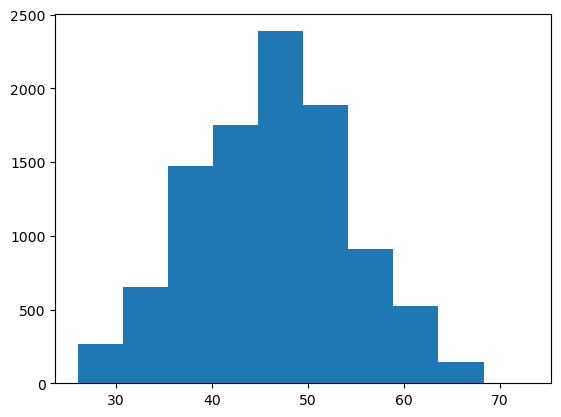

In [3]:
m1 = plt.hist(mpshe['Customer_Age'], bins = 10) 

# Display the plot 
plt.show() 

<Axes: >

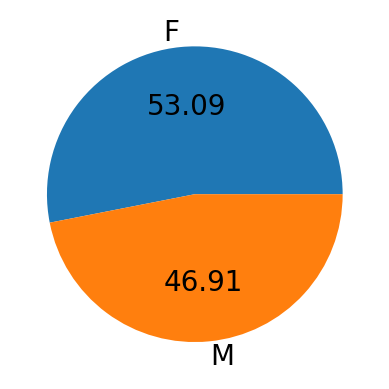

In [4]:
from matplotlib.pyplot import pie, axis, show
mpshe.groupby('Gender').size().plot(kind='pie', autopct='%.2f',textprops={'fontsize': 20})


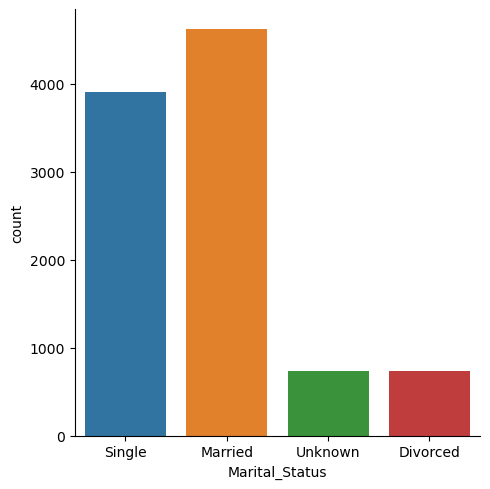

In [23]:
sns.catplot(data=mpshe, x='Marital_Status', kind='count')


<Axes: >

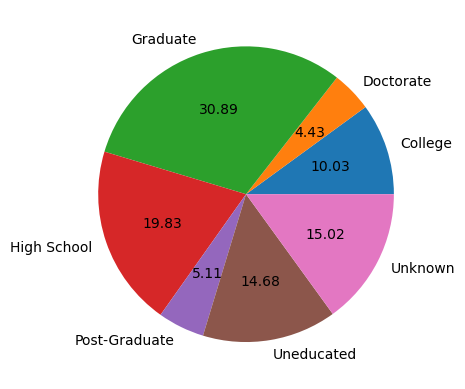

In [18]:
from matplotlib.pyplot import pie, axis, show
mpshe.groupby('Education_Level').size().plot(kind='pie', autopct='%.2f',textprops={'fontsize': 10})

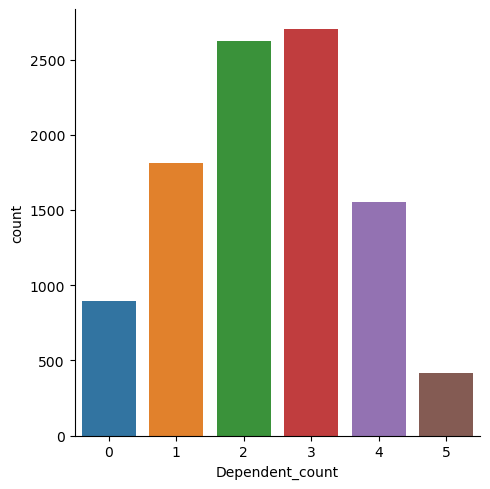

In [24]:
sns.catplot(data=mpshe, x='Dependent_count', kind='count')

<Axes: >

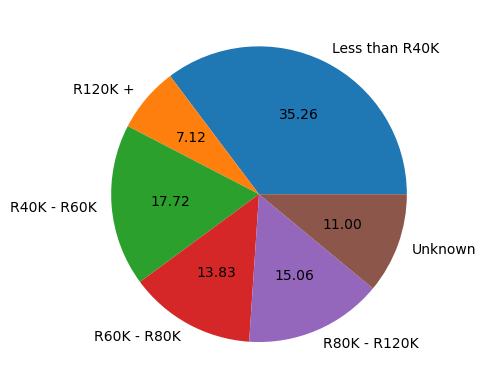

In [25]:
from matplotlib.pyplot import pie, axis, show
mpshe.groupby('Income_Category').size().plot(kind='pie', autopct='%.2f',textprops={'fontsize': 10})



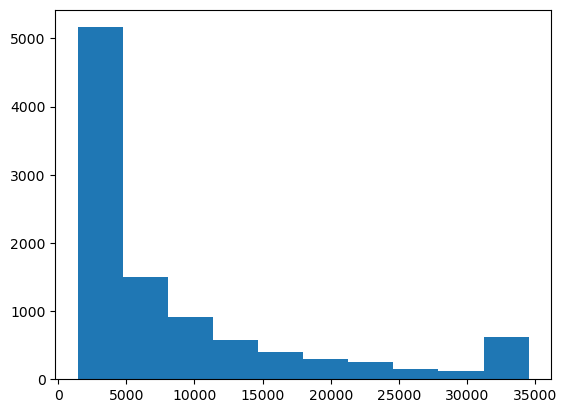

In [26]:
plt.hist(mpshe['Credit_Limit'], bins = 10) 

# Display the plot 
plt.show() 

In [5]:
emu = mpshe[['Attrition_Flag','Customer_Age','Gender','Dependent_count','Education_Level',
             'Marital_Status','Income_Category','Card_Category','Months_on_book',
             'Total_Relationship_Count', 'Months_Inactive_12_mon','Contacts_Count_12_mon',
             'Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
             'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']].copy()


In [6]:
emu1 = emu[['Customer_Age','Dependent_count','Months_on_book',
             'Total_Relationship_Count', 'Months_Inactive_12_mon','Contacts_Count_12_mon',
             'Credit_Limit','Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1',
             'Total_Trans_Amt','Total_Trans_Ct','Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']].copy()

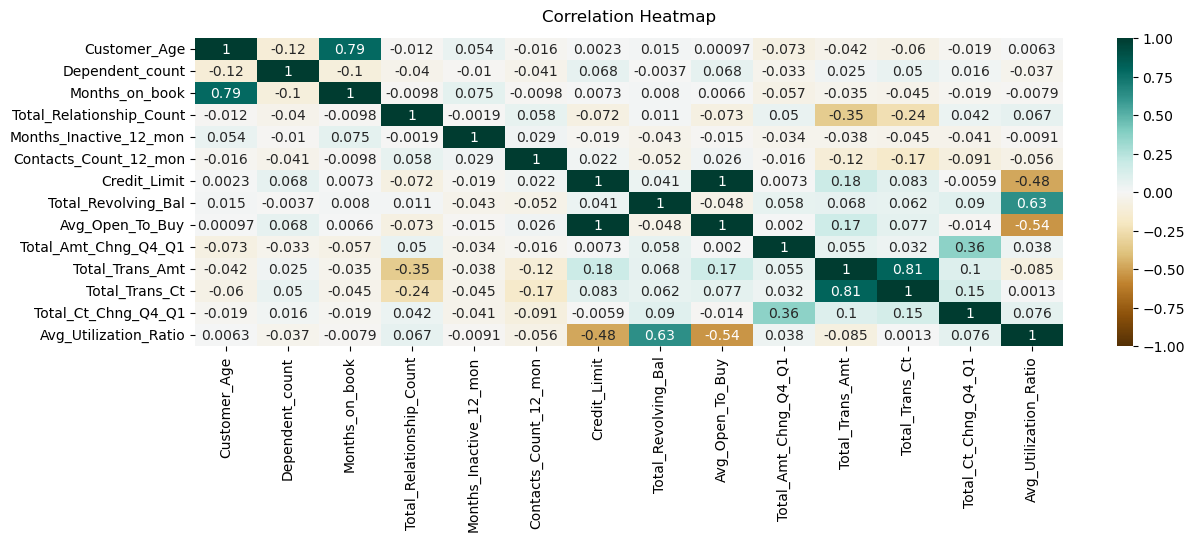

In [5]:
 plt.figure(figsize=(14, 4))
heatmap = sns.heatmap(emu1.corr(), vmin=-1, vmax=1, annot=True,cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
  

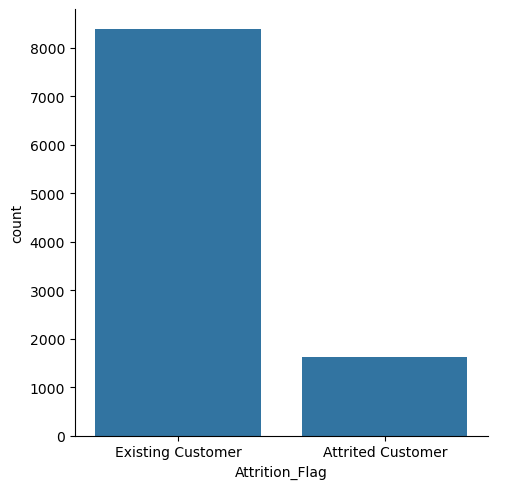

In [6]:
sns.catplot(data=emu, x='Attrition_Flag', kind='count')

In [28]:
import imblearn
print(imblearn.__version__)

0.12.2


In [7]:
emu['Status'] = np.where(emu['Attrition_Flag'].str.contains('Existing Customer'), 1, 0)
emu[['Status', 'Attrition_Flag']].head(100)

,Status,Attrition_Flag
0,1,Existing Customer
1,1,Existing Customer
2,1,Existing Customer
3,1,Existing Customer
4,1,Existing Customer
...,...,...
95,0,Attrited Customer
96,1,Existing Customer
97,1,Existing Customer
98,1,Existing Customer


In [13]:
X = emu.loc[:,['Customer_Age','Dependent_count','Months_on_book','Months_Inactive_12_mon','Credit_Limit',
               'Total_Revolving_Bal','Avg_Open_To_Buy','Total_Amt_Chng_Q4_Q1','Total_Trans_Amt','Total_Trans_Ct',
               'Total_Ct_Chng_Q4_Q1','Avg_Utilization_Ratio']].values


In [14]:
y = emu.loc[:,'Status'].values

In [18]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=3)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(7499, 12) (2500, 12) (7499,) (2500,)


In [19]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [26]:
import sklearn

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_res = scaler.fit_transform(X_res)
X_test = scaler.transform(X_test)


In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

lr = LogisticRegression()
lr.fit(X_res, y_res)


y_pred = lr.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 83.12%
Confusion Matrix:
 [[ 347   72]
 [ 350 1731]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.83      0.62       419
           1       0.96      0.83      0.89      2081

    accuracy                           0.83      2500
   macro avg       0.73      0.83      0.76      2500
weighted avg       0.88      0.83      0.85      2500



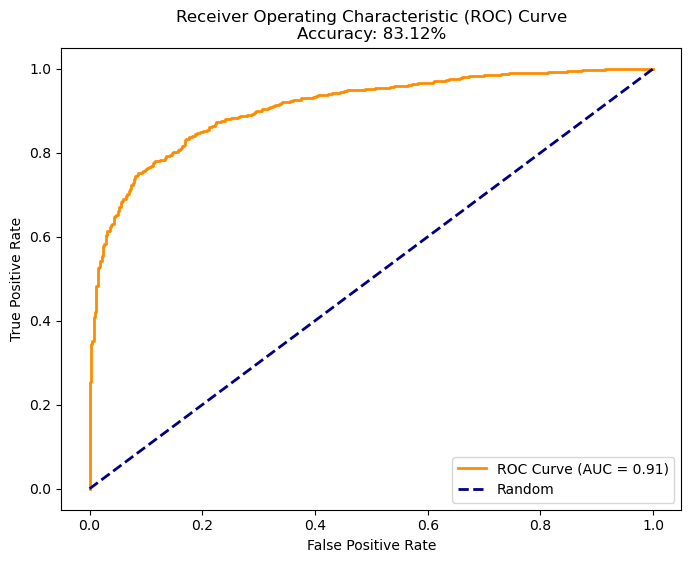

In [31]:
# Plot ROC Curve
y_prob = lr.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
 
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2,
         label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve\nAccuracy: {:.2f}%'.format(
    accuracy * 100))
plt.legend(loc="lower right")
plt.show()